<a href="https://colab.research.google.com/github/sardarhassan10/Billiards_Table_Detection/blob/main/DIP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import cv2 
from google.colab.patches import cv2_imshow
from matplotlib.colors import hsv_to_rgb
import matplotlib.pyplot as plt
from skimage.morphology import square, rectangle
from skimage import io, color, data, filters, morphology, util

Import Image

In [ ]:
#img = cv2.imread('IM2.png')
#img = cv2.imread('IM1.jpeg')
#img = cv2.imread('IM3.jpeg')
#img = cv2.imread('IM4.png')
#img = cv2.imread('im5.png')
img = cv2.imread('IM6.png')
#img = cv2.imread('IM7.jpeg')
#img = cv2.imread('IM8.jpg')
#img = cv2.imread('IM9.jpg')
#img = cv2.imread('IM10.jpeg')

Display Image

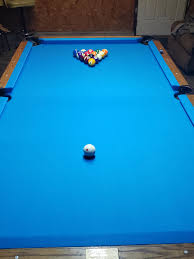

In [ ]:
cv2_imshow(img)

Function to get maximum

In [ ]:
def maximum(a, b, c): 
  
    if (a >= b) and (a >= c): 
        largest = 'R' 
  
    elif (b >= a) and (b >= c): 
        largest = 'B' 
    else: 
        largest = 'G'
          
    return largest 

Find colour of billord

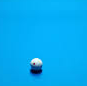

R is  5.672146484897087  B is  242.10438385458434  G is  171.35204490777866
Billord colour is  B


In [ ]:
height, width = img.shape[:2]
middle_size = max(height,width)/3
middle_values = img[int((height-middle_size)/2):int((height+middle_size)/2),int((width-middle_size)/2):int((width+middle_size)/2)]
mean_blue = np.mean(middle_values[:,:,0])
mean_green = np.mean(middle_values[:,:,1])
mean_red = np.mean(middle_values[:,:,2])

cv2_imshow(middle_values)
print("R is ", mean_red, " B is ", mean_blue," G is ", mean_green)
colour = maximum(mean_red,mean_blue,mean_green)
print("Billord colour is ",colour)

Find HSV colour ranges

In [ ]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print( hsv_green )

blue = np.uint8([[[255,0,0 ]]])
hsv_blue = cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)
print( hsv_blue )

red = np.uint8([[[0,0,255 ]]])
hsv_red = cv2.cvtColor(red,cv2.COLOR_BGR2HSV)
print( hsv_red )

[[[ 60 255 255]]]
[[[120 255 255]]]
[[[  0 255 255]]]


Keep only billard table colour

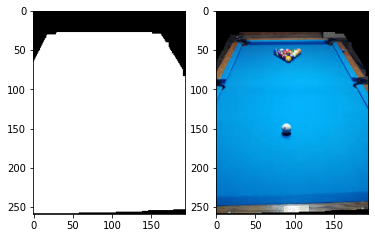

In [ ]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#BGR for CV2
if colour == 'G':
  light_colour = np.array([36,100,100]) #([25,189,118]) [44,100,100]
  dark_colour = np.array([86,255,255])  
elif colour == 'R':
  light_colour = np.array([160,100,100]) 
  dark_colour = np.array([179,255,255])  
elif colour == 'B':
  light_colour = np.array([94,120,120]) 
  dark_colour = np.array([140,255,255])  

mask = cv2.inRange(hsv_img, light_colour, dark_colour)
kernel = np.ones((5,5),np.uint8)
mask = cv2.dilate(mask,kernel,iterations = 5)
#mask = cv2.erode(mask,kernel,iterations = 3)
#temp = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#mask =  np.abs(mask ^ temp)
result = cv2.bitwise_and(img, img, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
b,g,r = cv2.split(result)       # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb
plt.subplot(1, 2, 2)
plt.imshow(rgb_img)
plt.show()




Find contours and output highlighted play area

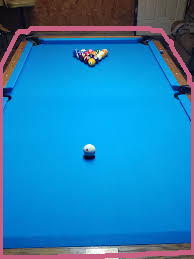

In [ ]:
img1 = img.copy()
imgray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
#imgray = unknown
ret, thresh = cv2.threshold(imgray, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (132,96,200),3)
cv2_imshow(img)
